# Chapter 7: Iterated Function Systems
*Based on M. F. Barnsley*

## Summary

Iterated Function Systems (IFS) provide a powerful framework for generating and analyzing fractals. Key concepts:

- **Contractive mappings**: Functions that bring points closer together
- **Attractor**: The unique fixed point of an IFS in the space of compact sets
- **Chaos game (random iteration)**: Probabilistic method to render attractors
- **Deterministic algorithm**: Iterating all transformations on sets
- **Collage theorem**: Basis for fractal image compression
- **Affine transformations**: $T(x) = Ax + b$ — rotation, scaling, translation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown, IntSlider, FloatSlider
%matplotlib inline
plt.style.use('dark_background')

## 7.1 Affine Transformations

An affine transformation has the form:
$$\begin{pmatrix} x' \\ y' \end{pmatrix} = \begin{pmatrix} a & b \\ c & d \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} + \begin{pmatrix} e \\ f \end{pmatrix}$$

In [2]:
def apply_affine(points, a, b, c, d, e, f):
    """Apply affine transformation to points"""
    new_x = a * points[:, 0] + b * points[:, 1] + e
    new_y = c * points[:, 0] + d * points[:, 1] + f
    return np.column_stack([new_x, new_y])

def demo_affine(a=0.5, b=0.0, c=0.0, d=0.5, e=0.25, f=0.25):
    """Demonstrate affine transformation"""
    # Unit square
    square = np.array([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
    transformed = apply_affine(square, a, b, c, d, e, f)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(square[:, 0], square[:, 1], 'w-', lw=2, label='Original')
    ax.fill(square[:, 0], square[:, 1], alpha=0.2, color='white')
    ax.plot(transformed[:, 0], transformed[:, 1], 'c-', lw=2, label='Transformed')
    ax.fill(transformed[:, 0], transformed[:, 1], alpha=0.3, color='cyan')
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_title(f'Affine: a={a}, b={b}, c={c}, d={d}, e={e}, f={f}')
    plt.show()

interact(demo_affine,
         a=FloatSlider(min=-1, max=1, step=0.1, value=0.5),
         b=FloatSlider(min=-1, max=1, step=0.1, value=0.0),
         c=FloatSlider(min=-1, max=1, step=0.1, value=0.0),
         d=FloatSlider(min=-1, max=1, step=0.1, value=0.5),
         e=FloatSlider(min=-1, max=1, step=0.1, value=0.25),
         f=FloatSlider(min=-1, max=1, step=0.1, value=0.25));

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0, min=-1.0), FloatSlider(value=0.0, descr…

## 7.2 IFS Fractals via Chaos Game

Randomly select and apply transformations to generate the attractor.

In [3]:
def chaos_game(transforms, probs, n_points=100000):
    """Generate IFS attractor using chaos game"""
    points = np.zeros((n_points, 2))
    points[0] = [0.5, 0.5]
    
    for i in range(1, n_points):
        # Select transformation based on probabilities
        t_idx = np.random.choice(len(transforms), p=probs)
        a, b, c, d, e, f = transforms[t_idx]
        
        x, y = points[i-1]
        points[i, 0] = a*x + b*y + e
        points[i, 1] = c*x + d*y + f
    
    return points[1000:]  # Skip transient

## 7.3 Classic IFS Examples

In [4]:
# IFS definitions: each transform is (a, b, c, d, e, f)
ifs_collection = {
    'Sierpiński Triangle': {
        'transforms': [
            (0.5, 0, 0, 0.5, 0, 0),
            (0.5, 0, 0, 0.5, 0.5, 0),
            (0.5, 0, 0, 0.5, 0.25, 0.433),
        ],
        'probs': [1/3, 1/3, 1/3]
    },
    'Barnsley Fern': {
        'transforms': [
            (0, 0, 0, 0.16, 0, 0),
            (0.85, 0.04, -0.04, 0.85, 0, 1.6),
            (0.2, -0.26, 0.23, 0.22, 0, 1.6),
            (-0.15, 0.28, 0.26, 0.24, 0, 0.44),
        ],
        'probs': [0.01, 0.85, 0.07, 0.07]
    },
    'Maple Leaf': {
        'transforms': [
            (0.14, 0.01, 0, 0.51, -0.08, -1.31),
            (0.43, 0.52, -0.45, 0.5, 1.49, -0.75),
            (0.45, -0.49, 0.47, 0.47, -1.62, -0.74),
            (0.49, 0, 0, 0.51, 0.02, 1.62),
        ],
        'probs': [0.25, 0.25, 0.25, 0.25]
    },
    'Fractal Tree': {
        'transforms': [
            (0, 0, 0, 0.5, 0, 0),
            (0.42, -0.42, 0.42, 0.42, 0, 0.2),
            (0.42, 0.42, -0.42, 0.42, 0, 0.2),
            (0.1, 0, 0, 0.1, 0, 0.2),
        ],
        'probs': [0.05, 0.4, 0.4, 0.15]
    },
    'Sierpiński Carpet': {
        'transforms': [
            (1/3, 0, 0, 1/3, 0, 0),
            (1/3, 0, 0, 1/3, 1/3, 0),
            (1/3, 0, 0, 1/3, 2/3, 0),
            (1/3, 0, 0, 1/3, 0, 1/3),
            (1/3, 0, 0, 1/3, 2/3, 1/3),
            (1/3, 0, 0, 1/3, 0, 2/3),
            (1/3, 0, 0, 1/3, 1/3, 2/3),
            (1/3, 0, 0, 1/3, 2/3, 2/3),
        ],
        'probs': [1/8] * 8
    },
    'Dragon Curve': {
        'transforms': [
            (0.5, -0.5, 0.5, 0.5, 0, 0),
            (-0.5, -0.5, 0.5, -0.5, 1, 0),
        ],
        'probs': [0.5, 0.5]
    },
}

def plot_ifs(name):
    ifs = ifs_collection[name]
    points = chaos_game(ifs['transforms'], ifs['probs'], 150000)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(points[:, 0], points[:, 1], s=0.1, c='lime', alpha=0.4)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(name)
    plt.show()

interact(plot_ifs, name=Dropdown(options=list(ifs_collection.keys()), value='Barnsley Fern'));

interactive(children=(Dropdown(description='name', index=1, options=('Sierpiński Triangle', 'Barnsley Fern', '…

## 7.4 Deterministic IFS Algorithm

Apply all transformations to the current set, building up the attractor level by level.

In [5]:
def deterministic_ifs(transforms, n_iter, initial_points=None):
    """Build IFS attractor deterministically"""
    if initial_points is None:
        # Start with unit square
        t = np.linspace(0, 2*np.pi, 100)
        initial_points = np.column_stack([np.cos(t), np.sin(t)])
    
    points = initial_points.copy()
    
    for _ in range(n_iter):
        new_points = []
        for a, b, c, d, e, f in transforms:
            transformed = apply_affine(points, a, b, c, d, e, f)
            new_points.append(transformed)
        points = np.vstack(new_points)
    
    return points

def plot_deterministic(n_iter):
    transforms = ifs_collection['Sierpiński Triangle']['transforms']
    points = deterministic_ifs(transforms, n_iter)
    
    fig, ax = plt.subplots(figsize=(10, 9))
    ax.scatter(points[:, 0], points[:, 1], s=0.5, c='cyan', alpha=0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(f'Deterministic IFS (n = {n_iter}, {len(points)} points)')
    plt.show()

interact(plot_deterministic, n_iter=IntSlider(min=1, max=10, value=5, description='Iterations'));

interactive(children=(IntSlider(value=5, description='Iterations', max=10, min=1), Output()), _dom_classes=('w…

## 7.5 Custom IFS Builder

Create your own IFS by defining transformations.

In [6]:
def custom_ifs(scale1=0.5, rot1=0, tx1=0, ty1=0,
               scale2=0.5, rot2=0, tx2=0.5, ty2=0,
               scale3=0.5, rot3=0, tx3=0.25, ty3=0.433):
    """Build custom IFS from parameters"""
    def make_transform(scale, rot, tx, ty):
        theta = np.radians(rot)
        a = scale * np.cos(theta)
        b = -scale * np.sin(theta)
        c = scale * np.sin(theta)
        d = scale * np.cos(theta)
        return (a, b, c, d, tx, ty)
    
    transforms = [
        make_transform(scale1, rot1, tx1, ty1),
        make_transform(scale2, rot2, tx2, ty2),
        make_transform(scale3, rot3, tx3, ty3),
    ]
    probs = [1/3, 1/3, 1/3]
    
    points = chaos_game(transforms, probs, 80000)
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(points[:, 0], points[:, 1], s=0.2, c='magenta', alpha=0.5)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Custom IFS')
    plt.show()

interact(custom_ifs,
         scale1=FloatSlider(min=0.1, max=0.8, step=0.05, value=0.5, description='Scale 1'),
         rot1=FloatSlider(min=-180, max=180, step=5, value=0, description='Rot 1'),
         tx1=FloatSlider(min=-1, max=1, step=0.1, value=0, description='X 1'),
         ty1=FloatSlider(min=-1, max=1, step=0.1, value=0, description='Y 1'),
         scale2=FloatSlider(min=0.1, max=0.8, step=0.05, value=0.5, description='Scale 2'),
         rot2=FloatSlider(min=-180, max=180, step=5, value=0, description='Rot 2'),
         tx2=FloatSlider(min=-1, max=1, step=0.1, value=0.5, description='X 2'),
         ty2=FloatSlider(min=-1, max=1, step=0.1, value=0, description='Y 2'),
         scale3=FloatSlider(min=0.1, max=0.8, step=0.05, value=0.5, description='Scale 3'),
         rot3=FloatSlider(min=-180, max=180, step=5, value=0, description='Rot 3'),
         tx3=FloatSlider(min=-1, max=1, step=0.1, value=0.25, description='X 3'),
         ty3=FloatSlider(min=-1, max=1, step=0.1, value=0.433, description='Y 3'));

interactive(children=(FloatSlider(value=0.5, description='Scale 1', max=0.8, min=0.1, step=0.05), FloatSlider(…

## 7.6 IFS Dimension

For an IFS with $N$ transformations each scaling by factor $r$, the similarity dimension is:
$$D = \frac{\log N}{\log(1/r)}$$

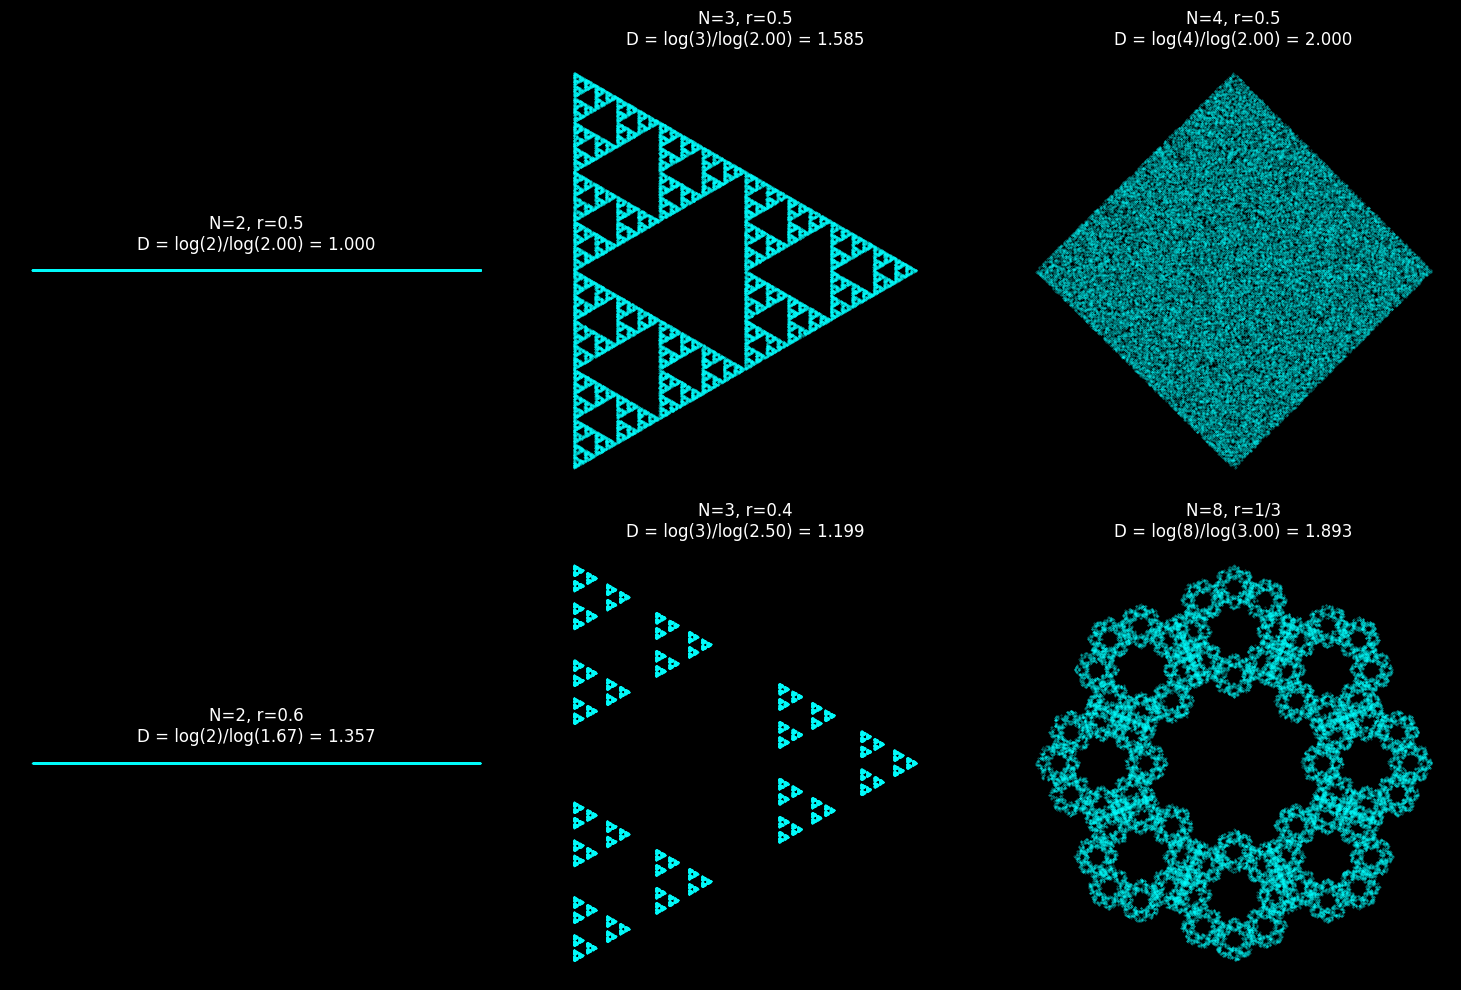

In [7]:
def ifs_dimension_demo():
    """Show relationship between IFS parameters and dimension"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    
    configs = [
        ('N=2, r=0.5', 2, 0.5),
        ('N=3, r=0.5', 3, 0.5),
        ('N=4, r=0.5', 4, 0.5),
        ('N=2, r=0.6', 2, 0.6),
        ('N=3, r=0.4', 3, 0.4),
        ('N=8, r=1/3', 8, 1/3),
    ]
    
    for ax, (name, n, r) in zip(axes.flat, configs):
        # Generate transforms arranged in a line or grid
        transforms = []
        for i in range(n):
            angle = 2 * np.pi * i / n
            tx = (1 - r) * 0.5 * (1 + np.cos(angle))
            ty = (1 - r) * 0.5 * (1 + np.sin(angle))
            transforms.append((r, 0, 0, r, tx, ty))
        
        probs = [1/n] * n
        points = chaos_game(transforms, probs, 50000)
        
        dim = np.log(n) / np.log(1/r)
        
        ax.scatter(points[:, 0], points[:, 1], s=0.1, c='cyan', alpha=0.5)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_title(f'{name}\nD = log({n})/log({1/r:.2f}) = {dim:.3f}')
    
    plt.tight_layout()
    plt.show()

ifs_dimension_demo()

## Notes

- **Contraction mapping theorem**: Guarantees existence and uniqueness of IFS attractor
- **Collage theorem**: To approximate a target image, find transformations whose images "collage" to cover it
- **Fractal compression**: IFS codes can compress images by storing only transformation parameters
- **Measure theory**: Probabilities in chaos game correspond to a measure on the attractor